Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab 
terhubung dengan Github Anda, buat notebook baru dan beri nama 
“Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di 
Drive Anda dengan cara sebagai berikut.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Implementasikan 6 metode template matching pada OpenCV dengan 
menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai 
templatenya.

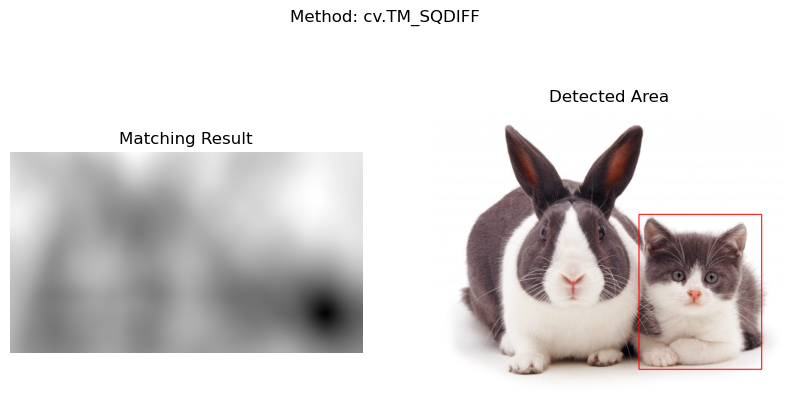

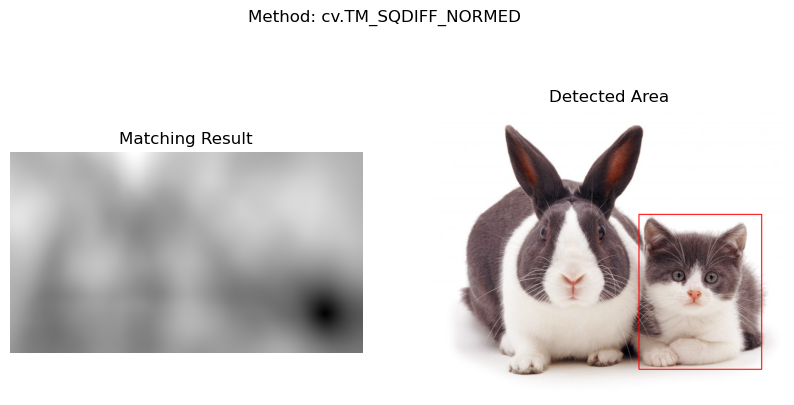

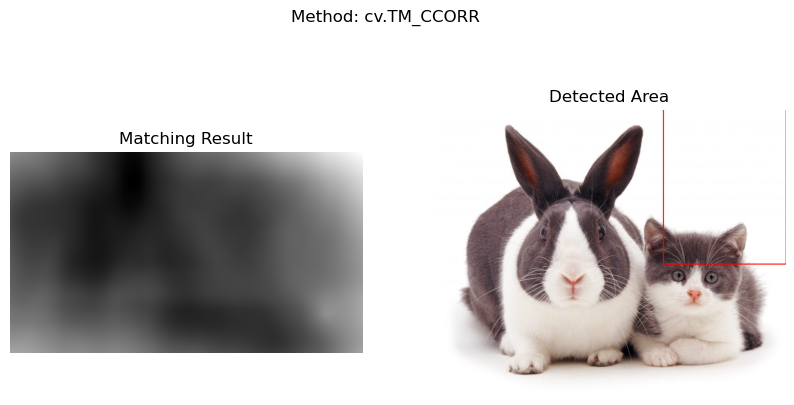

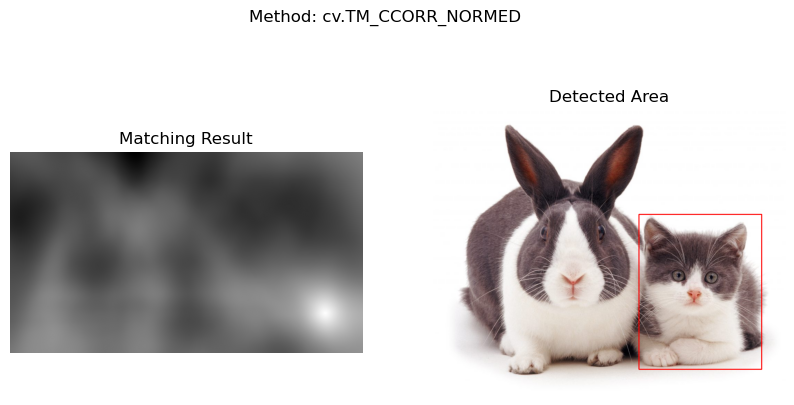

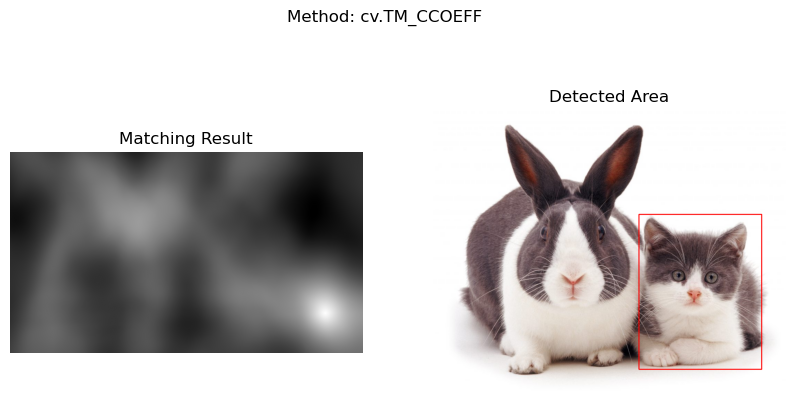

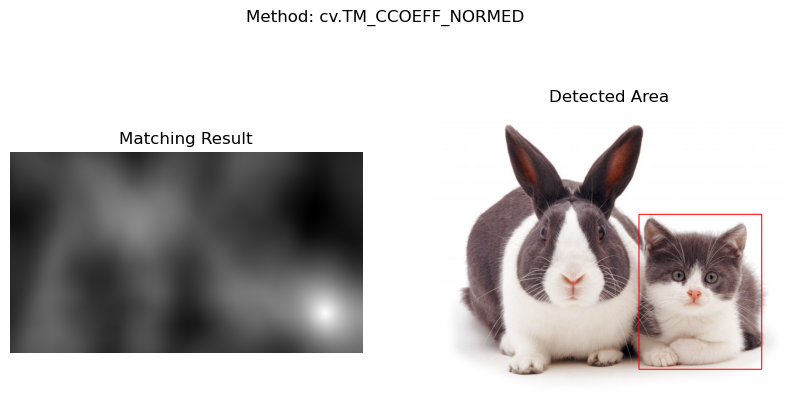

In [2]:
img = cv.imread('D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\cat2_templatejpg.jpg', cv.IMREAD_GRAYSCALE)

# --- 2. Dapatkan ukuran template ---
w, h = template.shape[::-1]

# --- 3. Daftar metode template matching ---
methods = [
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED'
]

# --- 4. Loop untuk setiap metode ---
for meth in methods:
    img_copy = img.copy()
    method = eval(meth)

    # --- Template Matching ---
    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # --- Tentukan lokasi terbaik ---
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # --- Gambar kotak hasil pencocokan ---
    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    # --- Tampilkan hasil ---
    plt.figure(figsize=(10,5))
    plt.suptitle(f'Method: {meth}')

    plt.subplot(1,2,1)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
    plt.title('Detected Area')
    plt.axis('off')

    plt.show()

Implementasikan konsep template matching tanpa menggunakan library OpenCV 
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan 
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output 
sebagai berikut:

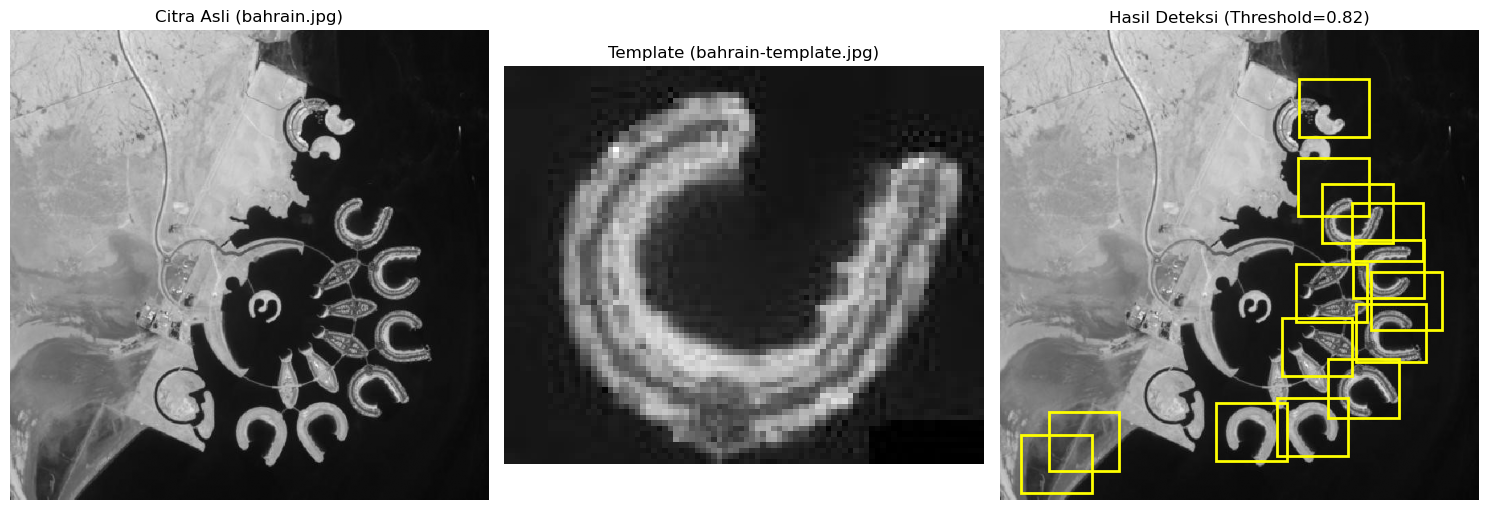

Jumlah objek terdeteksi: 14


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- 1. Load gambar ---
img = np.array(Image.open(r'D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\bahrain.jpg').convert('L'))  # grayscale
template = np.array(Image.open(r'D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\bahrain-template.jpg').convert('L'))
th, tw = template.shape

# --- 2. Konversi ke float untuk perhitungan ---
img = img.astype(np.float32)
template = template.astype(np.float32)

# --- 3. Template Matching manual (Mean Squared Difference) ---
h, w = img.shape
result = np.zeros((h - th + 1, w - tw + 1), dtype=np.float32)

for y in range(h - th + 1):
    for x in range(w - tw + 1):
        patch = img[y:y+th, x:x+tw]
        diff = patch - template
        result[y, x] = np.sum(diff**2)

# --- 4. Normalisasi hasil (0–1), semakin kecil semakin mirip ---
result_norm = (result - np.min(result)) / (np.max(result) - np.min(result))
similarity = 1 - result_norm  # nilai tinggi berarti cocok

# --- 5. Threshold untuk multiple object detection ---
threshold = 0.82
y_coords, x_coords = np.where(similarity >= threshold)

# --- 6. Non-Maximum Suppression sederhana ---
selected_points = []
min_dist = tw // 2  # jarak minimum antar deteksi

for (y, x) in zip(y_coords, x_coords):
    if all(np.hypot(x - sx, y - sy) > min_dist for (sy, sx) in selected_points):
        selected_points.append((y, x))

# --- 7. Visualisasi hasil ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gambar asli
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Citra Asli (bahrain.jpg)')
axes[0].axis('off')

# Template
axes[1].imshow(template, cmap='gray')
axes[1].set_title('Template (bahrain-template.jpg)')
axes[1].axis('off')

# Hasil deteksi
axes[2].imshow(img, cmap='gray')
for (y, x) in selected_points:
    rect = plt.Rectangle((x, y), tw, th, edgecolor='yellow', facecolor='none', linewidth=2)
    axes[2].add_patch(rect)
axes[2].set_title(f'Hasil Deteksi (Threshold={threshold})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Jumlah objek terdeteksi: {len(selected_points)}")


Implementasikan metode Sobel Edge Detection, Canny Edge 
Detection, dan Laplacian Edge Detection pada OpenCV dengan 
menggunakan gambar car-park.jpg

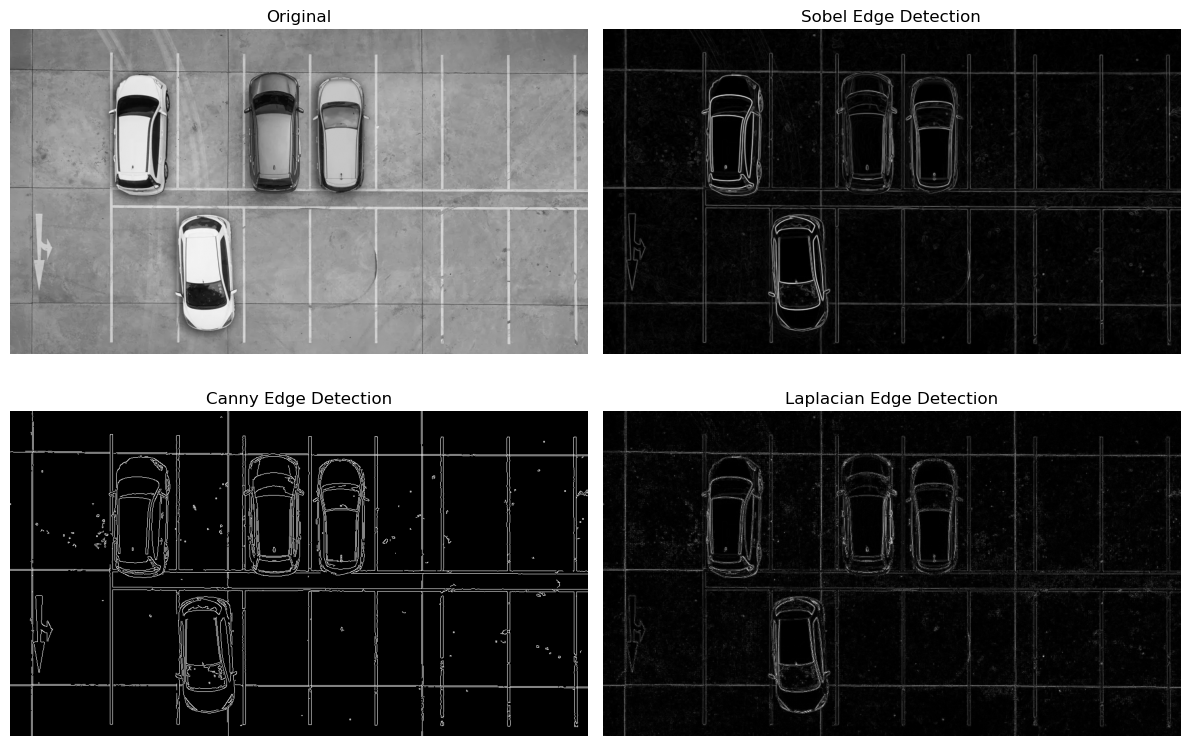

In [4]:
import cv2
import matplotlib.pyplot as plt
image_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\car-park.jpg"

# Membaca gambar
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Sobel Edge Detection
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

# 2. Canny Edge Detection
canny = cv2.Canny(gray, 100, 200)

# 3. Laplacian Edge Detection
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Tampilkan hasil
titles = ['Original', 'Sobel Edge Detection', 'Canny Edge Detection', 'Laplacian Edge Detection']
images = [gray, sobel_combined, canny, laplacian]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Implementasikan metode Harris Corner Detection dan Shi-Tomasi 
Detection pada OpenCV dengan menggunakan gambar chess
board.jpg

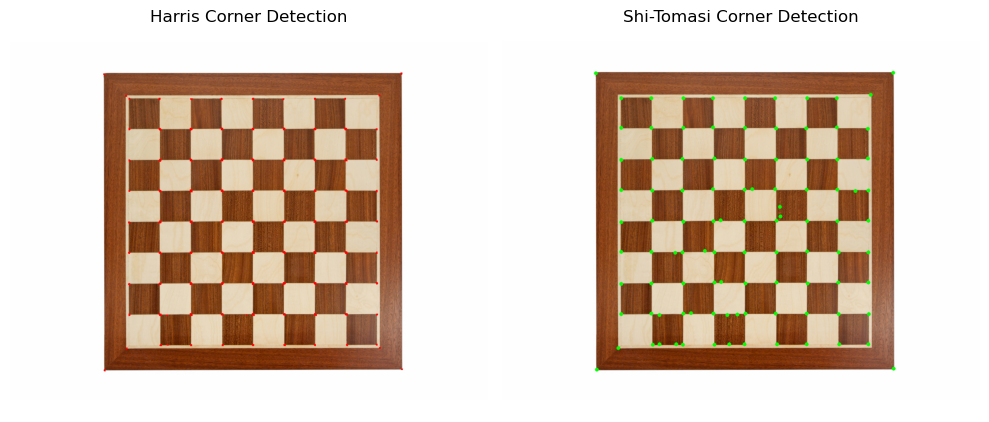

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\chess-board.jpg"

img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_float = np.float32(gray)
dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
harris_img = img.copy()
harris_img[dst > 0.01 * dst.max()] = [0, 0, 255]  


shi_img = img.copy()
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(np.int32)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(shi_img, (x, y), 4, (0, 255, 0), -1) 


plt.figure(figsize=(10, 5))
titles = ['Harris Corner Detection', 'Shi-Tomasi Corner Detection']
images = [harris_img[..., ::-1], shi_img[..., ::-1]]

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


Implementasikan metode Hough Transform pada OpenCV dengan 
menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang 
terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut: 

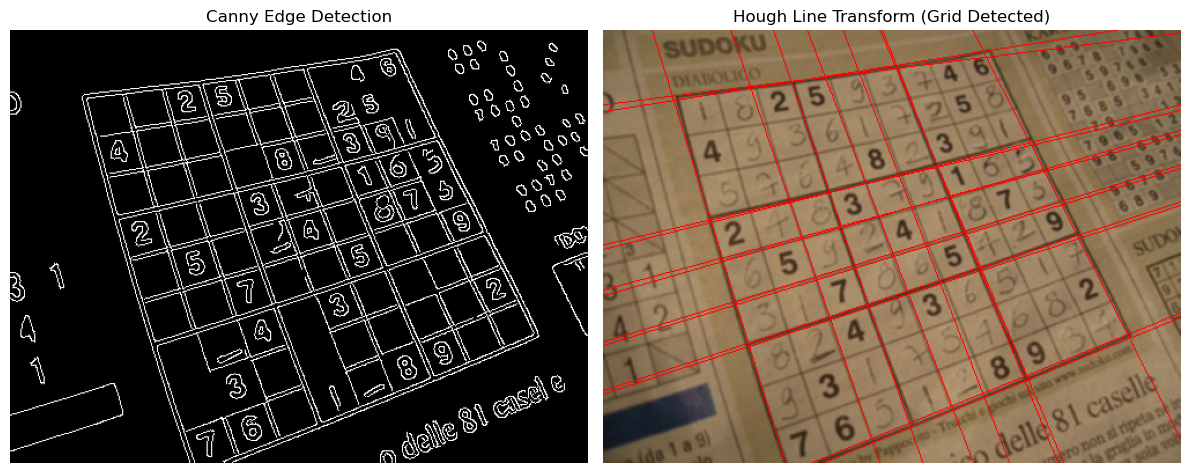

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path gambar
image_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\sudoku.jpg"

# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Lakukan Gaussian Blur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. Gunakan Canny Edge Detection
edges = cv2.Canny(blur, 50, 150, apertureSize=3)

# 4. Hough Transform untuk mendeteksi garis
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

# Salin gambar untuk hasil akhir
hough_img = img.copy()

# 5. Gambar garis hasil deteksi
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(hough_img, (x1, y1), (x2, y2), (0, 0, 255), 1)

# 6. Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(hough_img, cv2.COLOR_BGR2RGB))
plt.title("Hough Line Transform (Grid Detected)")
plt.axis("off")

plt.tight_layout()
plt.show()


Implementasikan fungsi findContours() pada OpenCV untuk contour detection 
dengan menggunakan gambar laptop.jpg

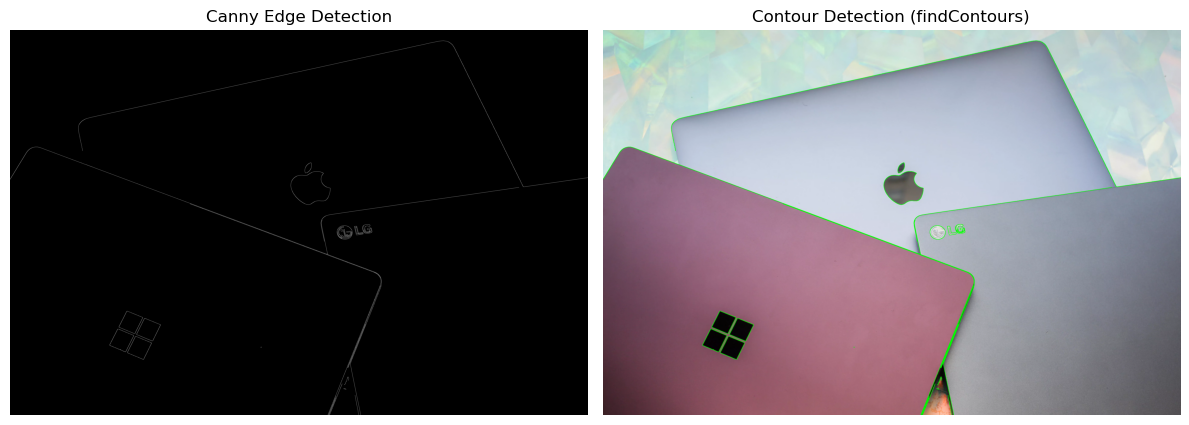

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\laptop.jpg"

img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blur, 50, 150)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection (findContours)')
plt.axis('off')

plt.tight_layout()
plt.show()


D2. Praktikum Feature Matching dan Face Detection 

Lakukan Face Detection untuk image object lain yang tersedia pada 
(/images/facedet). Tampilkan seperti pada contoh berikut. 

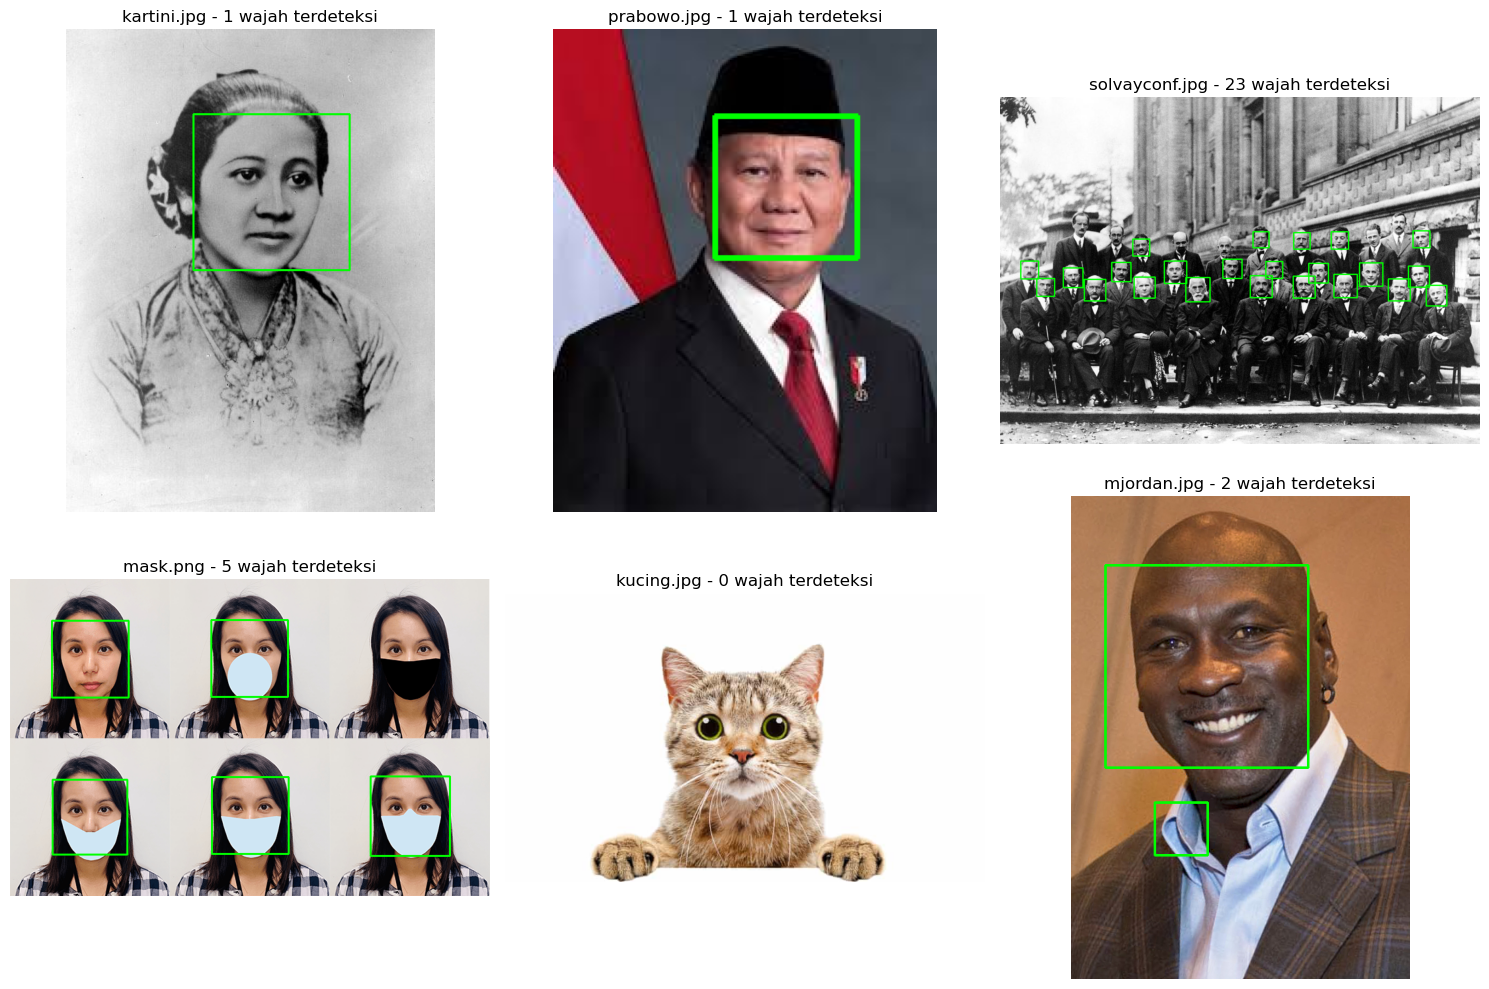

In [8]:
import cv2
import matplotlib.pyplot as plt


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


image_paths = [
    r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\kartini.jpg",
    r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\prabowo.jpg",
    r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\solvayconf.jpg",
    r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\mask.png",
    r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\kucing.jpg",
    r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\mjordan.jpg"
]


plt.figure(figsize=(15, 10))
for i, path in enumerate(image_paths, 1):
    
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{path.split('\\')[-1]} - {len(faces)} wajah terdeteksi")
    plt.axis('off')

plt.tight_layout()
plt.show()


Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi 
wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal 
ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml 
yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan 
searching melalui search engines. dan Cobakan juga untuk eyes detection pada wajah Pak Prabowo:

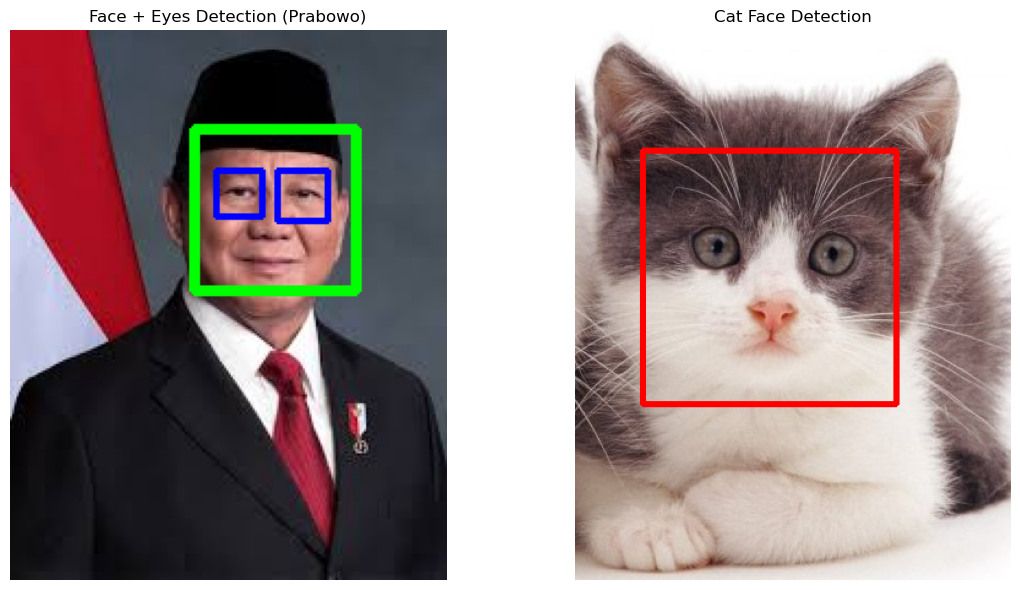

In [9]:
import cv2
import matplotlib.pyplot as plt

path_prabowo = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\prabowo.jpg" 
path_cat = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\Object Detection\cat2_templatejpg.jpg"


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
cat_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')

img_prabowo = cv2.imread(path_prabowo)
gray_prabowo = cv2.cvtColor(img_prabowo, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray_prabowo, 1.1, 5)
for (x, y, w, h) in faces:
    
    cv2.rectangle(img_prabowo, (x, y), (x+w, y+h), (0, 255, 0), 3)
    
    
    roi_gray = gray_prabowo[y:y+h, x:x+w]
    roi_color = img_prabowo[y:y+h, x:x+w]

 
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3) 

    for (ex, ey, ew, eh) in eyes:

        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)


img_cat = cv2.imread(path_cat)
gray_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2GRAY)


cat_faces = cat_face_cascade.detectMultiScale(gray_cat, 1.1, 5) 
for (x, y, w, h) in cat_faces:
    cv2.rectangle(img_cat, (x, y), (x+w, y+h), (0, 0, 255), 3)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_prabowo, cv2.COLOR_BGR2RGB))
plt.title("Face + Eyes Detection (Prabowo)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.title("Cat Face Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

Lakukan deteksi senyuman pada gambar

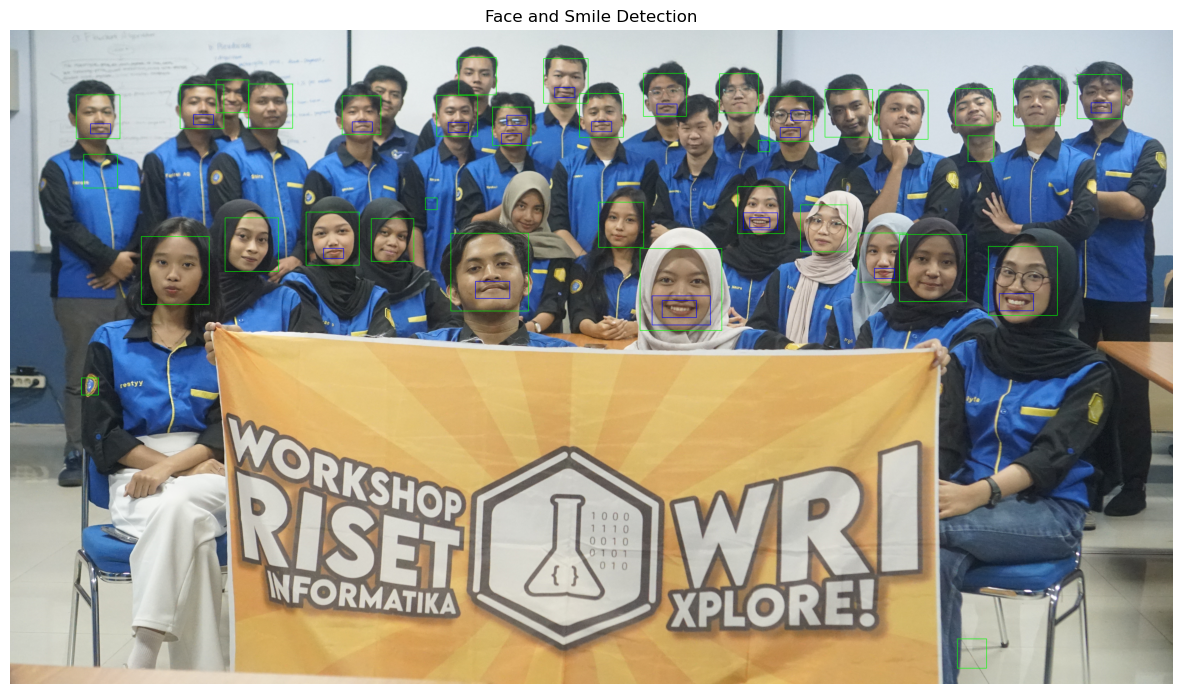

In [10]:
import cv2
import matplotlib.pyplot as plt

path_group = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\WRI.JPG"

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

img_group = cv2.imread(path_group)
gray_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_group, scaleFactor=1.1, minNeighbors=7, minSize=(30, 30))

for (x, y, w, h) in faces:

    cv2.rectangle(img_group, (x, y), (x+w, y+h), (0, 255, 0), 2)

    roi_gray = gray_group[y:y+h, x:x+w]
    roi_color = img_group[y:y+h, x:x+w]

    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=20, minSize=(25,25))

    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (255, 0, 0), 2)


plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB))
plt.title("Face and Smile Detection")
plt.axis('off')
plt.show()

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial 
selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat 
dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [11]:
import cv2
import numpy as np
import io

try:
    face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(face_cascade_path)
    if face_cascade.empty():
        raise IOError(f"Gagal memuat file cascade wajah dari: {face_cascade_path}")
except Exception as e:
    print(f"Error: {e}")
    print("Pastikan OpenCV (opencv-python) terinstal dengan benar.")
    print("Anda bisa instal dengan: pip install opencv-python")
    exit()

print("Memulai kamera...")
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Tidak bisa membuka kamera.")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Gagal membaca frame. Keluar...")
        break

    frame = cv2.flip(frame, 1)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3) # Kotak hijau
        
    cv2.imshow('Face Tracking - Tekan Q untuk Keluar', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


print("Menutup kamera dan jendela...")
cap.release()
cv2.destroyAllWindows()

Memulai kamera...
Menutup kamera dan jendela...


HASIL

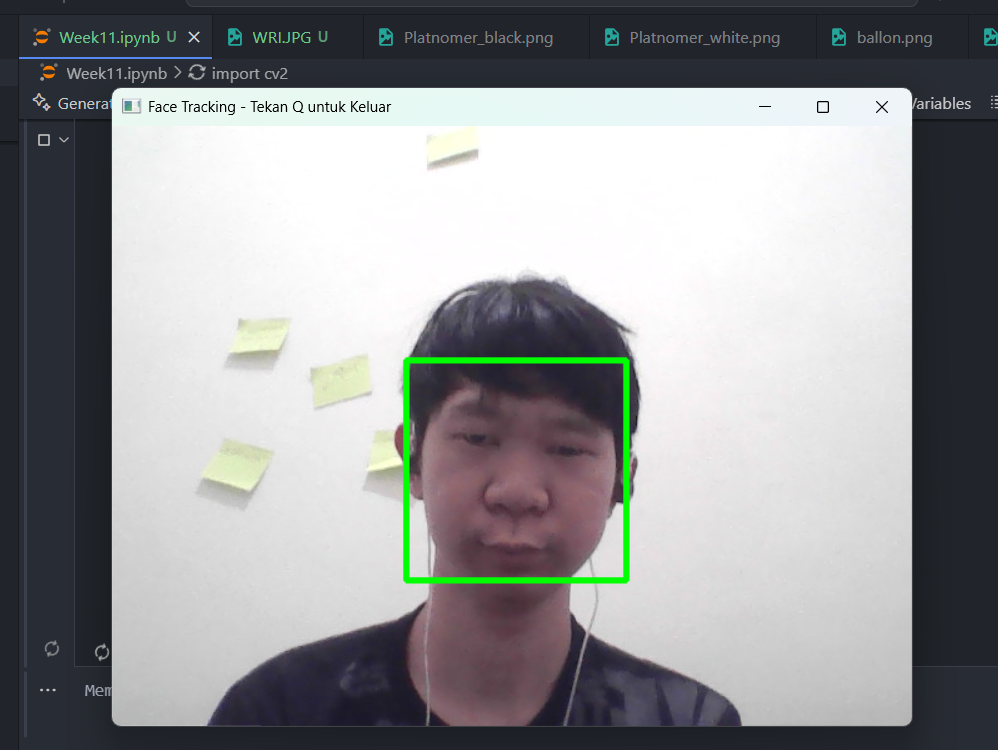

Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya. 
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

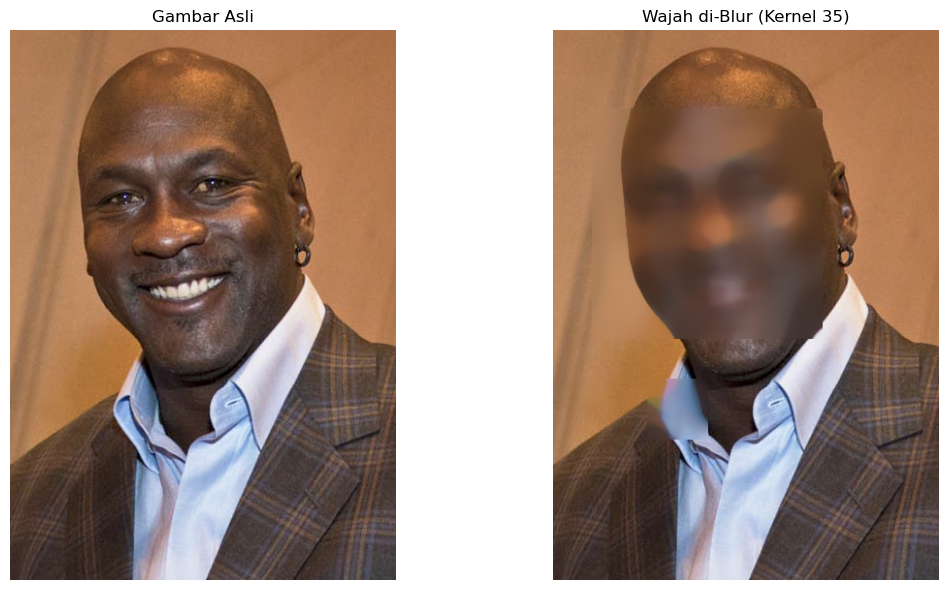

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

path_image = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\facedet\mjordan.jpg"

try:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        raise IOError("Gagal memuat file cascade wajah. Pastikan OpenCV terinstal dengan benar.")
except Exception as e:
    print(f"Error: {e}")
    print("Pastikan OpenCV terinstal dengan benar (pip install opencv-python).")
    exit()

img = cv2.imread(path_image)

if img is None:
    print(f"Error: Gagal memuat gambar dari {path_image}")
    exit()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

img_blurred = img.copy()

for (x, y, w, h) in faces:

    roi_face = img_blurred[y:y+h, x:x+w]

    kernel_size = 35 
    blurred_face = cv2.medianBlur(roi_face, kernel_size)

    img_blurred[y:y+h, x:x+w] = blurred_face

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blurred_rgb = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_blurred_rgb)
plt.title(f"Wajah di-Blur (Kernel {kernel_size})")
plt.axis('off')

plt.tight_layout()
plt.show()

Mengolah gambar KTM masing-masing
1. Tampilkan foto citra yg asli
2. Tampilkan Foto KTM
3. Lakukan Deteksi Obyek KTM pada gambar yang berisi KTM dengan barang lainnya dengan menggunakan Konsep Feature Matching 

Tampilkan Foto Citra Asli & 2. Tampilkan Foto KTM

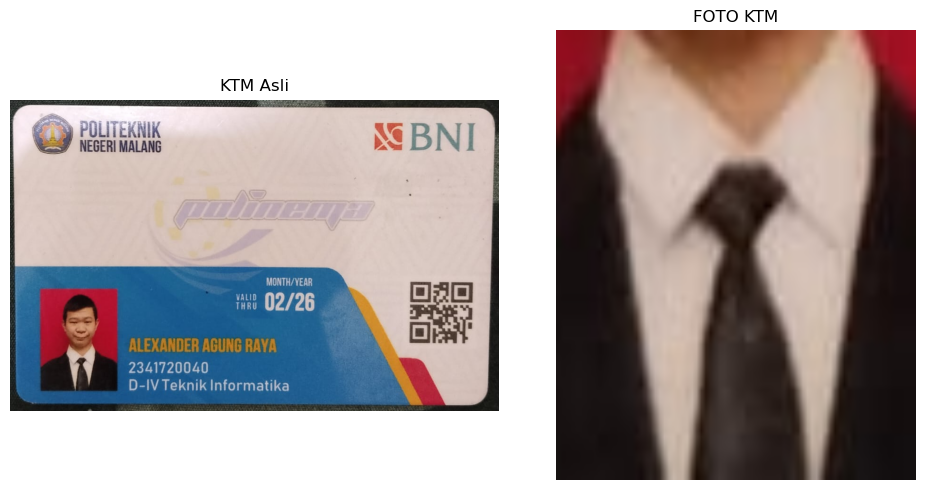

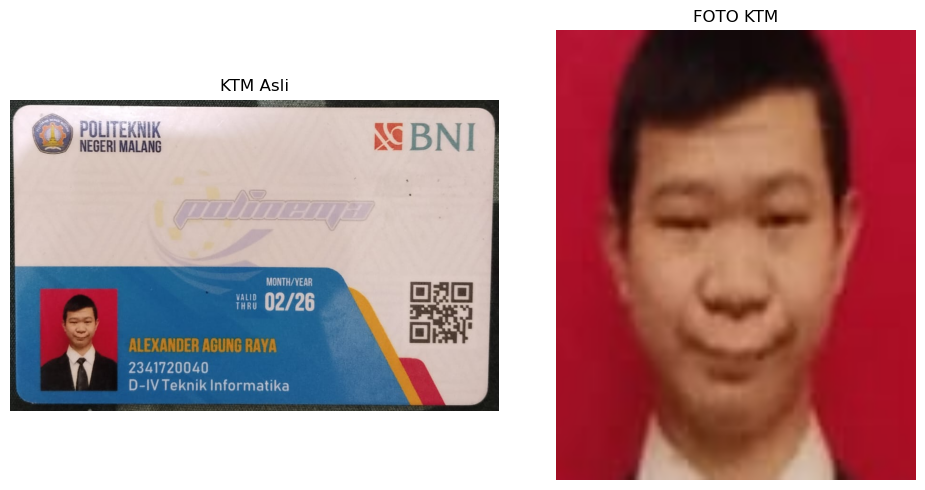

In [34]:
# 1. Load model deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# 2. Baca gambar KTM
img = cv2.imread('D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\KTM.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# 4. Jika wajah ditemukan, crop dan tampilkan
for (x, y, w, h) in faces:
    # Tambahkan margin supaya wajah tidak kepotong
    pad_x, pad_y = int(w*0.2), int(h*0.2)
    y1, y2 = max(0, y-pad_y), min(img.shape[0], y+h+pad_y)
    x1, x2 = max(0, x-pad_x), min(img.shape[1], x+w+pad_x)
    
    crop_face = img[y1:y2, x1:x2]
    crop_resized = cv2.resize(crop_face, (400, 500))

    # 5. Tampilkan hasil
    plt.figure(figsize=(10,5))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('KTM Asli')
    plt.axis('off')

    # Hasil crop wajah
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(crop_resized, cv2.COLOR_BGR2RGB))
    plt.title('FOTO KTM')
    plt.axis('off')

    plt.tight_layout()
    plt.show()